# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dwi Rizki Kurnia
- **Email:** dwirizkikurnia94@gmail.com
- **ID Dicoding:** MC009D5X2369

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Pertanyaan 2 Kapan jam-jam sibuk dalam penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
# Load data day.csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data diatas akan menampilan 4 baris pertama dari data frame day_df

In [5]:
# Load data hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data selanjutnya yang kita muat adalah hour_df, data tersebut juga menampilkan 4 baris pertama dari data frame hour_df

### Assessing Data

In [6]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Pertama kita memeriksa type data dari tiap kolom day_df dan hour_df

In [7]:
# mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight**
- Tidak ada missing value pada data frame day_df dan hour_df

In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight**
- Tidak ada data duplikasi pada day_df dan hour_df

In [10]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

*   Mengubah nilai season dari angka menjadi nama musim agar lebih mudah dibaca.
*   Mengubah dteday ke format datetime supaya bisa digunakan untuk analisis waktu.

*   Memastikan tidak ada nilai yang hilang atau duplikasi, agar analisis akurat.

*  Mengubah nilai weathersit dari angka menjadi kategori deskriptif untuk memahami pengaruh cuaca.

*   Mengonversi variabel yang ternormalisasi ke skala aslinya untuk suhu, kelembaban, dan kecepatan angin.

*   Memastikan tidak ada duplikasi atau missing values agar analisis lebih valid.

In [12]:
# Ubah kolom 'dteday' menjadi format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
# Mengubah nilai season dari angka menjadi nama musim agar lebih mudah dibaca.
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season"] = day_df["season"].map(season_mapping)
hour_df["season"] = hour_df["season"].map(season_mapping)

In [14]:
# Mengubah nilai weathersit dari angka menjadi kategori deskriptif untuk memahami pengaruh cuaca.
weathersit_mapping = {
    1: "Clear/Few Clouds",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
day_df["weathersit"] = day_df["weathersit"].map(weathersit_mapping)
hour_df["weathersit"] = hour_df["weathersit"].map(weathersit_mapping)

In [15]:
# Mengonversi variabel yang ternormalisasi ke skala aslinya untuk suhu, kelembaban, dan kecepatan angin.
day_df["temp"] = day_df["temp"] * 41
day_df["atemp"] = day_df["atemp"] * 50
day_df["hum"] = day_df["hum"] * 100
day_df["windspeed"] = day_df["windspeed"] * 67

hour_df["temp"] = hour_df["temp"] * 41
hour_df["atemp"] = hour_df["atemp"] * 50
hour_df["hum"] = hour_df["hum"] * 100
hour_df["windspeed"] = hour_df["windspeed"] * 67

In [16]:
# Cek duplikasi dan nilai yang hilang
if day_df.duplicated().sum() > 0:
    day_df.drop_duplicates(inplace=True)
if hour_df.duplicated().sum() > 0:
    hour_df.drop_duplicates(inplace=True)

day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)


**Insight:**
-  Sudah berubah nilai season dari angka menjadi nama musim agar lebih mudah dibaca.
*   Sudah berubah dteday ke format datetime supaya bisa digunakan untuk analisis waktu.

*   Sudah tidak ada nilai yang hilang atau duplikasi, agar analisis akurat.

*  Sudah mengubah nilai weathersit dari angka menjadi kategori deskriptif untuk memahami pengaruh cuaca.

*   Mengonversi variabel yang ternormalisasi ke skala aslinya untuk suhu, kelembaban, dan kecepatan angin.

*  Sudah tidak ada duplikasi atau missing values agar analisis lebih valid.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [17]:
# Melihat rangkuman parameter statistik dari data day_df menggunakan method describe()
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,Clear/Few Clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [22]:
# pengaruh musim terhadap jumlah peminjaman sepeda
day_df.groupby("season")["cnt"].sum().reset_index().sort_values(by="cnt", ascending=False)

,season,cnt
0,Fall,1061129
2,Summer,918589
3,Winter,841613
1,Spring,471348


**Insight:**
- Musim Gugur (Fall) memiliki jumlah peminjaman tertinggi dengan 1.061.129 peminjaman. Menunjukkan bahwa orang lebih banyak menggunakan sepeda pada musim gugur.

- Musim Panas (Summer) berada di posisi kedua dengan 918.589 peminjaman.

- Musim Dingin (Winter) memiliki lebih sedikit peminjaman dengan 841.613 peminjaman

- Musim Semi (Spring) memiliki jumlah peminjaman terendah dengan 471.348 peminjaman.


In [23]:
# Melihat rangkuman parameter statistik dari data hour_df menggunakan method describe()
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,Clear/Few Clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


## Explore data Hour_df

In [33]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hr").agg({
    "cnt": ["sum"]
})

,cnt
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


 Berdasarkan tabel diatas jam jam sibuk orang menyewa sepeda terjadi pada pukul 17.00

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-44-9737aa0bfcd0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


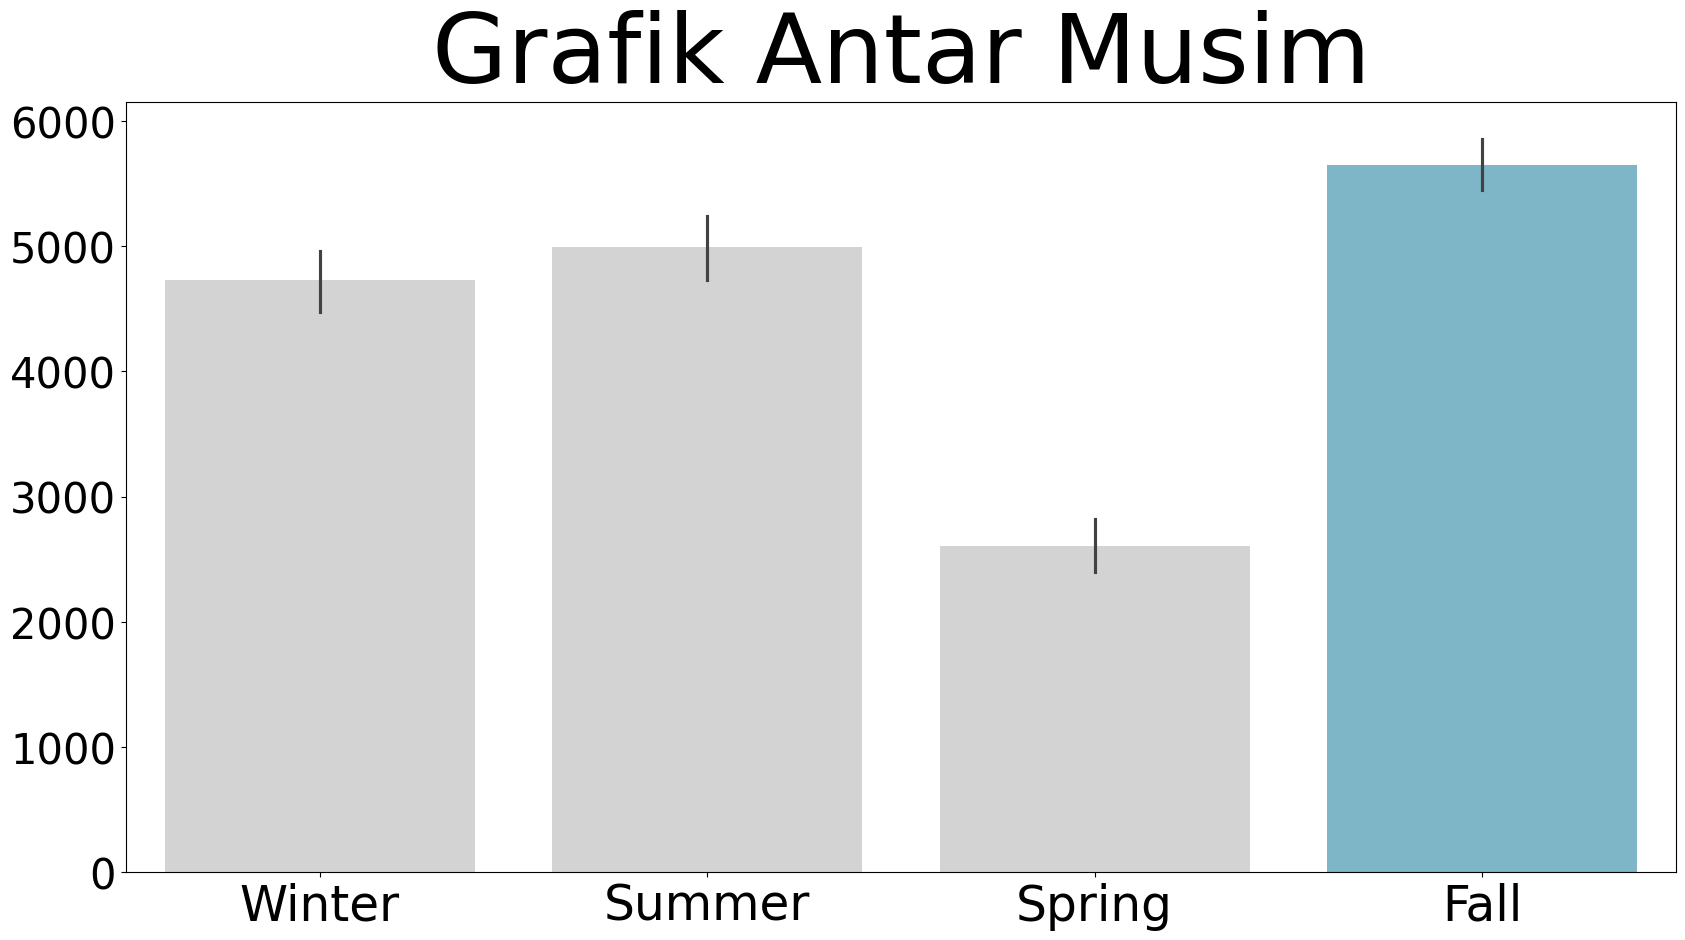

In [44]:
# Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

fig, ax = plt.subplots(figsize=(20, 10))

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

sns.barplot(
        y="cnt",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
ax.set_title("Grafik Antar Musim", loc="center", fontsize=70)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

plt.show()




*   Musim panas (Summer) dan musim gugur (Fall) memiliki jumlah peminjaman tertinggi.
*   Musim dingin (Winter) memiliki jumlah peminjaman yang lebih rendah, kemungkinan karena cuaca dingin dan salju.

*   Variasi peminjaman di setiap musim cukup besar, menunjukkan bahwa faktor lain (seperti hari kerja/libur atau cuaca) juga memengaruhi peminjaman.

### Pertanyaan 2:

<ipython-input-53-b2b1b8e898f1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours_label", y="count_cr", data=sum_order_items_df.head(5),


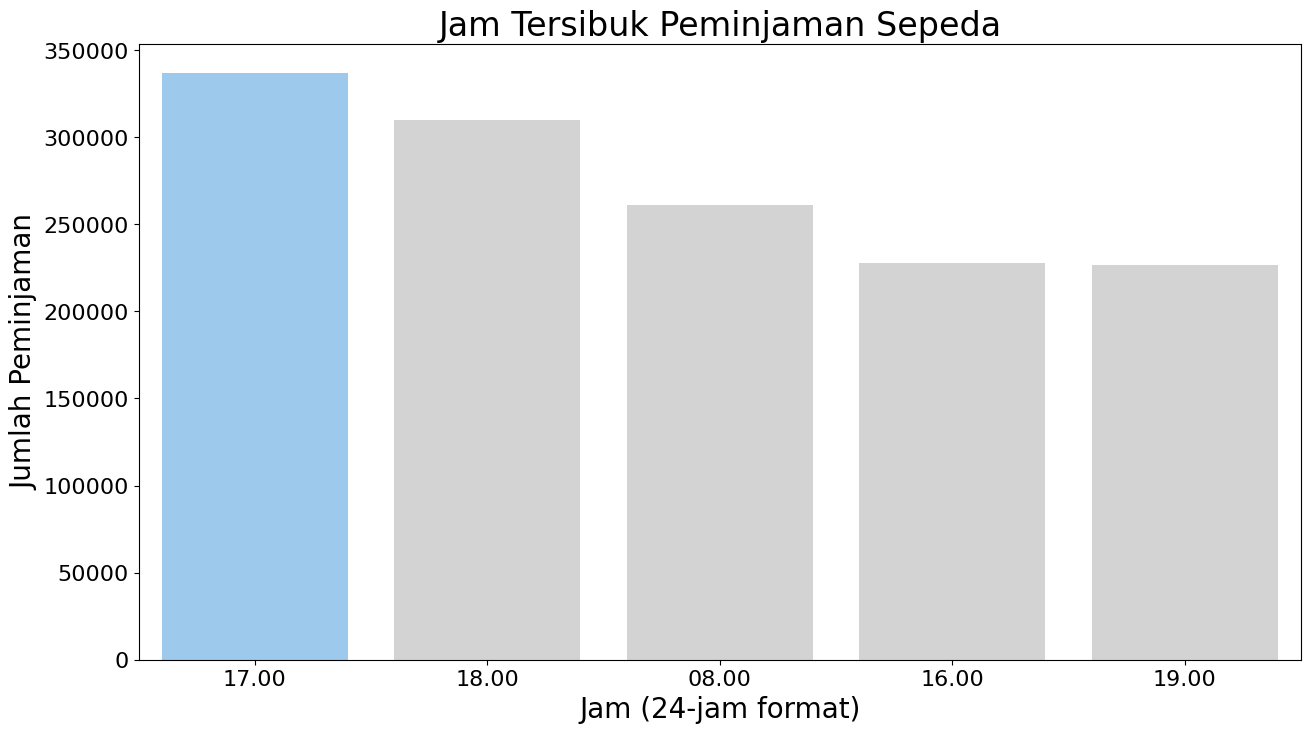

In [53]:
# Kapan jam-jam sibuk dalam penyewaan sepeda?

# Mengelompokkan jumlah penyewaan berdasarkan jam
sum_order_items_df = hour_df.groupby('hr')['cnt'].sum().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={'hr': 'hours', 'cnt': 'count_cr'})

# Mengurutkan berdasarkan jumlah penyewaan terbanyak
sum_order_items_df = sum_order_items_df.sort_values(by="count_cr", ascending=False)

sum_order_items_df['hours_label'] = sum_order_items_df['hours'].apply(lambda x: f"{x:02d}.00")

# Membuat barplot untuk 5 jam dengan penyewaan tertinggi
plt.figure(figsize=(15, 8))
sns.barplot(x="hours_label", y="count_cr", data=sum_order_items_df.head(5),
            palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])

# Pengaturan label dan judul
plt.xlabel("Jam (24-jam format)", fontsize=20)
plt.ylabel("Jumlah Peminjaman", fontsize=20)
plt.title("Jam Tersibuk Peminjaman Sepeda", fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Tampilkan plot
plt.show()


**Insight:**

Pengaruh musim pada peminjaman sepeda
- Peminjaman sepeda lebih tinggi pada musim Gugur dan Panas.
- Musim Gugur adalah musim dengan peminjaman sepeda terbanyak, mungkin karena suhu masih nyaman dan aktivitas luar ruangan masih tinggi.
- Peminjaman menurun pada musim Dingin dan Semi, kemungkinan karena kondisi cuaca yang kurang mendukung.

Jam jam tersibuk peminjaman sepeda
Jam tersibuk peminjaman sepeda terjadi pada jam 17.00

## Analisis Lanjutan (Opsional)

Analisis Clustering

In [66]:
# Grouping jumlah peminjaman berdasarkan kategori waktu
hour_df.groupby(by="time_category")['cnt'].sum().sort_values(ascending=False)

,cnt
time_category,
Sore,1057529
Pagi,770260
Malam,768585
Siang,696305


- Waktu Sore (15:00–18:59) menjadi waktu terbanyak untuk peminjaman sepeda, menunjukkan bahwa pengguna cenderung menggunakan sepeda

- Waktu Pagi (05:00–10:59) dan Malam (19:00–04:59) memiliki jumlah yang hampir sama dan cukup tinggi

- Waktu Siang (11:00–14:59) menjadi yang paling sedikit

## Conclusion

Pertanyaan

Pertanyaan 1 Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

Jawab:

- Peminjaman sepeda lebih tinggi pada musim Gugur dan Panas.
- Musim Gugur adalah musim dengan peminjaman sepeda terbanyak, mungkin karena suhu masih nyaman dan aktivitas luar ruangan masih tinggi.

- Peminjaman menurun pada musim Dingin dan musim semi, kemungkinan karena kondisi cuaca yang kurang mendukung.



Pertanyaan 2 Kapan jam-jam sibuk dalam penyewaan sepeda?

Jawab:

- Jam jam sibuk orang menyewa sepeda terjadi pada pukul 17.00

In [69]:
all_df.to_csv("all_data.csv", index=False)

In [70]:
# Simpan ke file CSV
day_df.to_csv('day_cleaned.csv', index=False)
hour_df.to_csv('hour_cleaned.csv', index=False)
